# Exercise: Polynomial Regression and Hyperparameters



Briefly explain polynomial regression + Compare hypotesis using regular linear regression with Polynomial regression to illustrate why we need the latter

What are hyperparemeters.

what we are doing in this Exercise

Mention metrics


## Preparing data
In this unit we are using fictional investment banking data, that display the amount of money accued according to the age of accounts.



In [94]:
# Import everything we will need for this unit
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


# Load data from our dataset file into a pandas dataframe
dataset = pd.read_csv('Data/investments.csv', index_col=False, sep=",",header=0)

# Check what's in the dataset
print(dataset.head(), "\n")



                             Account ID  Account Age  Total Accrued
0  106440e8-775d-4357-8485-d3923036b6c1           48          41239
1  b2c6c687-9c1a-4171-86d2-3ccf3759931d           12            920
2  db5f9ba8-0b3c-4fed-87fd-665bb273cbda           43          27851
3  73aa1fe8-dece-4aa5-a763-ddee06ef5aab           25           4304
4  213b5e44-60ce-447a-b7c3-12b465828af8           31          12805 



Let's do a *very* brief data exploration.

This dataset has three columns:

- "Account ID": Unique identifiers for each Account
- "Account Age": Number off years an account has been open
- "Total Accrued": Amount of money accrued for an account

Plotting the data reveals more information:

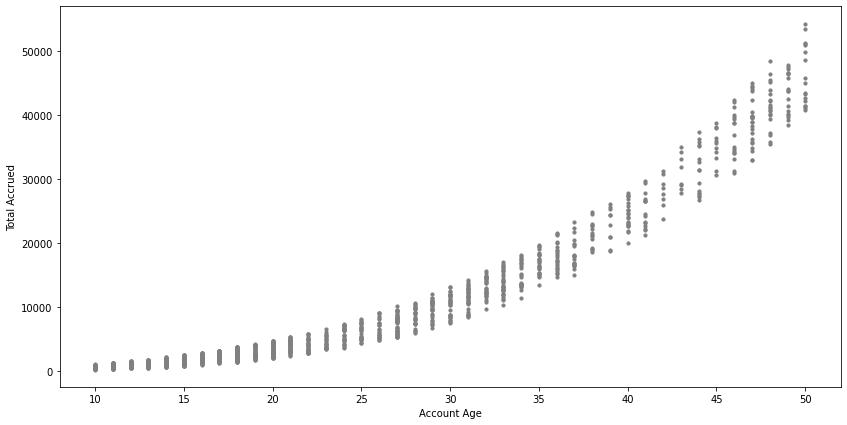

In [95]:
# Plot dataset points
%matplotlib inline
X = dataset["Account Age"]
y = dataset["Total Accrued"]

f = plt.figure()
f.set_figwidth(14)
f.set_figheight(7)
plt.scatter(X, y, s=10, color="gray")
plt.ylabel('Total Accrued')
plt.xlabel("Account Age")
plt.show()

We can gather some insights from the plot above:

- Older accounts *tend* to have larger amounts accrued, but that's not always the case (clients might have made withdrawals over time, or chosen different investment options)

- Older accounts show a much wider variation in results, newer accounts have similar outcomes

- Results are linear, they tend to increase **exponentially** over time

The last point is especially important. It tells us that we can't use a simple Linear Regression model, even though at first glance our data looks very simple.

## Polynomial Regression
- Show formula?
- Use Sklearn polynomial + linear to train/test



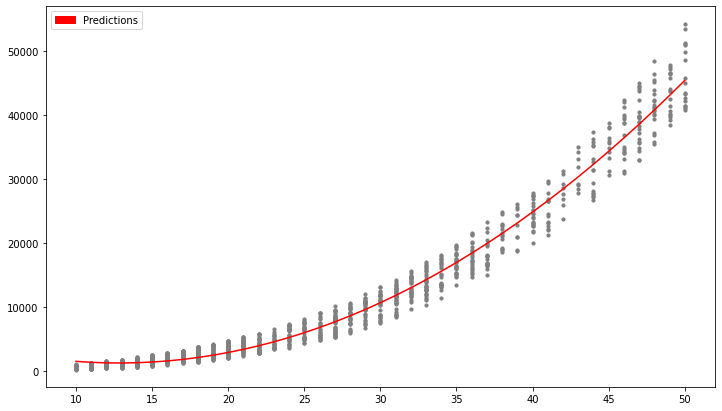

In [96]:
# X and y have to be two-domentional matrices
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

# Create a matrix of polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
y_hat = model.predict(X_poly)

# Plot hypothesis over datapoints
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(7)
plt.scatter(X, y, s=10, color="gray")
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_hat), key=sort_axis)
X, y_hat = zip(*sorted_zip)
plt.plot(X, y_hat, color="red")
# Add legend
red_patch = mpatches.Patch(color="red", label="Predictions")
plt.legend(handles=[red_patch])
plt.show()

Conclusion for the plot above

## Metrics
Use metrics such as RMSE/R2/Accuracy to evaluate the model

In [97]:
# metrics
rmse = np.sqrt(mean_squared_error(y,y_hat))
r2 = r2_score(y,y_hat)
original_rmse, original_r2 = rmse, r2
print(f"RMSE metrics: {rmse}")
print(f"R2 metrics: {r2}")

RMSE metrics: 18092.197609734863
R2 metrics: -1.2435126017065086


## Hyperparameters
- Briefly explain LR and num of iterations and tradeofs (when using gradient descent)
- Build a custom Class LinearRegressionWithGD that accepts hyperparams (explain why we have to) (sklearn does it automatically for us)
- Train model with a different number of iterations, ploting cost X iteration (use something too low, too high and something optimal)
- Gather metricts for best model, compare with the previous

- Animations showing the effects of learning rate on taining time go on next Unit

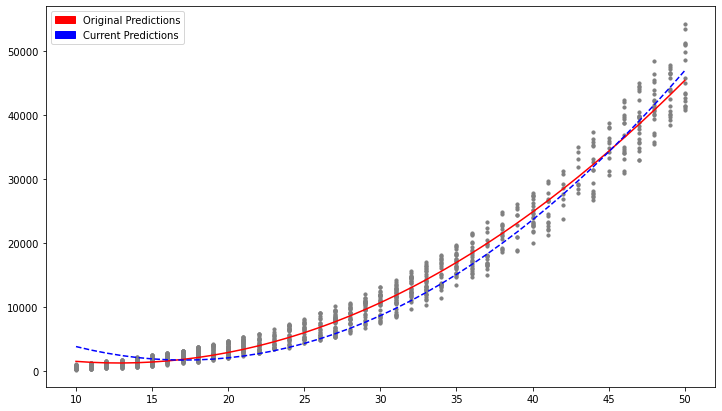

In [98]:

# Use a custom Polynomial Linear Regression implementation
# so we can set hyperparameters
import PolynomialLinearRegression as plr

X = dataset["Account Age"].values.reshape(-1,1)
y = dataset["Total Accrued"].values

# Initialize and train model
# setting values for learning rate and number of iterations
model2 = plr.PolynomialLinearRegression()
model2.fit(X, y, learning_rate=0.01, num_iters=300)

# Generate predictins based on original dataset
y_hat2 = model2.predict(X)

# Plot previous and new predictions over datapoints
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(7)
plt.scatter(X, y, s=10, color="gray")
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_hat2), key=sort_axis)
X, y_hat2 = zip(*sorted_zip)
l1 = plt.plot(X, y_hat, color="red")
l2 = plt.plot(X, y_hat2, "--", color="blue")
# Add legend
red_patch = mpatches.Patch(color="red", label="Original Predictions")
blue_patch = mpatches.Patch(color="blue", label="Current Predictions")
plt.legend(handles=[red_patch, blue_patch])
plt.show()


The dashed line above shows that out custom model could do better, especially compared to the original predictions using sklearn's `LinearModel`.

This was expected because we used such a low value for the `num_iter` hyperparam, setting it to only 300 iterations, while `LinearModel` does its best to optimize results. 

Training time is shorter, but the model needs more iterations to learn and get a better fit.

What happens if we train it using `1000` iterations?

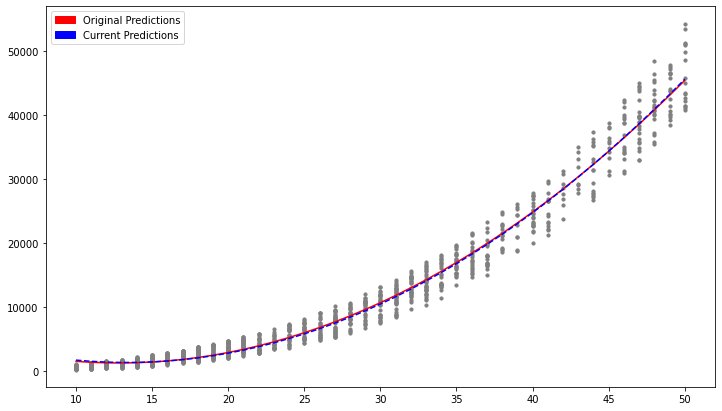

In [99]:
# retrain model, using 1000 iterations

# reset X and y
X = dataset["Account Age"].values.reshape(-1,1)
y = dataset["Total Accrued"].values

model2.fit(X, y, learning_rate=0.01, num_iters=1000)

# Generate predictins based on original dataset
y_hat3 = model2.predict(X)

# Plot previous and new predictions over datapoints
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(7)
plt.scatter(X, y, s=10, color="gray")
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_hat3), key=sort_axis)
X, y_hat3 = zip(*sorted_zip)
l1 = plt.plot(X, y_hat, color="red")
l2 = plt.plot(X, y_hat3, "--", color="blue")
# Add legend
red_patch = mpatches.Patch(color="red", label="Original Predictions")
blue_patch = mpatches.Patch(color="blue", label="Current Predictions")
plt.legend(handles=[red_patch, blue_patch])
plt.show()

Visually, we now have a near perfect fit to the original model, proving that the higher number of iterations improved the model's perfomance.

Let's check the metrics:

In [100]:
# metrics
rmse = np.sqrt(mean_squared_error(y,y_hat3))
r2 = r2_score(y,y_hat3)
print(f"RMSE metrics: {rmse}")
print(f"R2 metrics: {r2}")

RMSE metrics: 18095.09199139911
R2 metrics: -1.2442304914066002


In [101]:
# Use a dataframe to create a comparison table of metrics
l = [["Original Model", original_rmse, original_r2],
    ["Custom Model", rmse, r2]]

pd.DataFrame(l, columns=["", "RMSE", "R2"])

,,RMSE,R2
0,Original Model,18092.197610,-1.243513
1,Custom Model,18095.091991,-1.244230


Indeed, metrics for both models are very close now.

## Summary

- Recall what Polynomial Regression is and why we need it
- Recall what hyperparams are and how they influenced the model.
